# Exploratory Data Analisis. Saint-Petersburg Real Estate

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import timedelta


In [2]:
data = pd.read_csv('/datasets/real_estate_data_eng.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Saint Peterburg,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,Shushary village,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Saint Peterburg,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Saint Peterburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Saint Peterburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Conclusion

We were provided with the dataset of 23699 records with the task to do some preliminary exploration and suggest some new parameters for further usage in automated systems. From the general information we can see that there are a lot of missing values in the dataset and at first glance there are some unrealistic numbers  in columns like 'ceiling_height' and 'living_area'. <br>
At this stage the only thing we can conclude is that there are a lot of work needed to be done on this dataset to make it suetable for further analysis.

### Step 2. Data preprocessing

#### Missing values

Let's start with following some directions from task description and then move to the uncharted territory

In [5]:
data['balcony']. fillna(0, inplace=True)

In [6]:
tmp_arr = data['is_apartment'].unique()
tmp_arr

array([nan, False, True], dtype=object)

In [7]:
[type(x) for x in tmp_arr]

[float, bool, bool]

Due to specific meaning of the parameter "is_apartment" we can suggest with high level of confidence that missing values stands for False. That's because so called "apartments" are rather new addition to the Russian real estate market and any apartment on offer without mentioning its "is_apartment" status almost surely is regular one.

In [8]:
data['is_apartment'].fillna(False, inplace=True)

In [9]:
data[data['is_apartment']].shape

(50, 22)

Thus we have only 50 records out of 23699 total being True on the "is_apartment". This is way too small number for any meaningful conclusions in our study and we can definately recommend to remove this column completely later.

In [10]:
data['locality_name'].unique().shape[0]

342

In [11]:
data.query('locality_name == "Saint Peterburg"').shape

(15721, 22)

In [12]:
data[data['locality_name'].isna()].shape

(49, 22)

In [13]:
data[(data['locality_name'].isna()) & (data['cityCenters_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,False,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
14342,3,3611000.0,53.5,2017-04-27T00:00:00,1,NaN,4.0,25.8,3,False,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5985000.0,79.8,2018-07-30T00:00:00,3,NaN,9.0,NaN,2,False,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1750000.0,72.9,2018-10-27T00:00:00,3,NaN,5.0,47.3,2,False,...,8.3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3380000.0,56.0,2017-11-06T00:00:00,2,2.7,4.0,29.0,3,False,...,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
21715,2,6047550.0,80.1,2018-07-30T00:00:00,2,NaN,9.0,30.5,2,False,...,29.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0
21898,2,5886750.0,83.5,2018-07-30T00:00:00,2,NaN,9.0,36.6,2,False,...,29.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0
22717,9,3000000.0,35.0,2018-01-02T00:00:00,1,2.6,16.0,16.0,7,False,...,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0


We may try to fill missing values in locality_name from distances to city center and airport but with those 8 records above we can't do anything useful due too much data missing. So just get rid of them

In [14]:
data = data.drop(data[
    (data['locality_name'].isna()) 
    & (data['cityCenters_nearest'].isna())].index)
data.shape

(23691, 22)

In [15]:
city_data = data.query('locality_name == "Saint Peterburg"')
region_data = data.query('locality_name != "Saint Peterburg"')

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


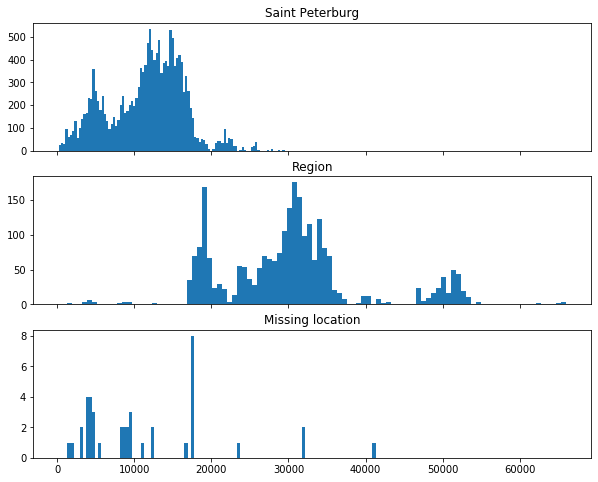

In [16]:
fig, axes = plt.subplots(3,1, sharex='col', figsize=(10,8))
axes[0].hist(city_data['cityCenters_nearest'], 100)
axes[0].set(title='Saint Peterburg')
axes[1].hist(region_data['cityCenters_nearest'], 100)
axes[1].set(title='Region')
axes[2].hist(data[data['locality_name'].isna()]['cityCenters_nearest'], 100)
axes[2].set(title='Missing location')
plt.show()

ok. Let's say anything below 18000 goes to Saint Petersburg 

In [17]:
data[(data['locality_name'].isna())].shape

(41, 22)

In [18]:
data[(data['locality_name'].isna()) & (data['cityCenters_nearest'] > 18000)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8986,10,4850000.0,103.1,2018-07-10T00:00:00,3,NaN,NaN,68.1,4,False,...,16.7,0.0,NaN,19659.0,31813.0,0.0,NaN,0.0,NaN,28.0
13690,7,3500000.0,71.0,2016-06-23T00:00:00,3,2.75,2.0,45.6,1,False,...,8.0,2.0,NaN,20234.0,23659.0,0.0,NaN,2.0,296.0,92.0
21119,8,3500000.0,43.2,2018-11-11T00:00:00,2,NaN,4.0,NaN,2,False,...,NaN,0.0,NaN,19744.0,31897.0,0.0,NaN,0.0,NaN,9.0
21276,0,17122148.0,178.3,2017-02-10T00:00:00,1,NaN,3.0,NaN,1,False,...,41.6,1.0,NaN,60195.0,41294.0,0.0,NaN,0.0,NaN,4.0


It's just 4 records with unknown locality name. Let's name it "Unknown region" because there are so many villages and we'll need to group them for analisis anyway later - better keep it for now

In [19]:
indices = data[(data['locality_name'].isna()) & (data['cityCenters_nearest'] > 18000)].index
indices

Int64Index([8986, 13690, 21119, 21276], dtype='int64')

In [20]:
data.loc[indices, 'locality_name'] = 'Unknown region'
data.loc[indices, 'locality_name']

8986     Unknown region
13690    Unknown region
21119    Unknown region
21276    Unknown region
Name: locality_name, dtype: object

In [21]:
data['locality_name'].fillna('Saint Peterburg', inplace=True)

In [22]:
data['floors_total'].isna().sum()

86

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38a425b8d0>]],
      dtype=object)

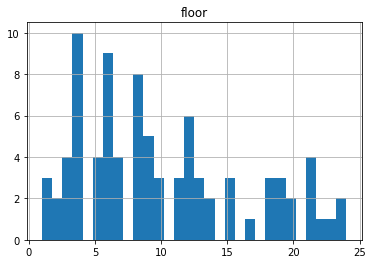

In [23]:
data[data['floors_total'].isna()].hist('floor', bins=30)

looks like no specific pattern for missing floors_total. so we fill missing values with median of ads with the same floor.

In [24]:
total_floor_dict = data.groupby('floor')['floors_total'].median().to_dict()
def fill_floors_total(row):
    if np.isnan(row['floors_total']):
        return total_floor_dict[row['floor']]
    return row['floors_total']

In [25]:
data['floors_total'] = data.apply(fill_floors_total, axis=1)

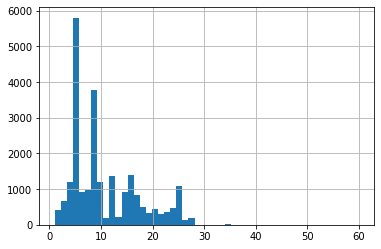

In [26]:
data['floors_total'].hist(bins=50)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23691 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23691 non-null int64
last_price              23691 non-null float64
total_area              23691 non-null float64
first_day_exposition    23691 non-null object
rooms                   23691 non-null int64
ceiling_height          14502 non-null float64
floors_total            23691 non-null float64
living_area             21789 non-null float64
floor                   23691 non-null int64
is_apartment            23691 non-null bool
studio                  23691 non-null bool
open_plan               23691 non-null bool
kitchen_area            21415 non-null float64
balcony                 23691 non-null float64
locality_name           23691 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

In [28]:
data[data['cityCenters_nearest'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5511 entries, 5 to 23698
Data columns (total 22 columns):
total_images            5511 non-null int64
last_price              5511 non-null float64
total_area              5511 non-null float64
first_day_exposition    5511 non-null object
rooms                   5511 non-null int64
ceiling_height          2942 non-null float64
floors_total            5511 non-null float64
living_area             4889 non-null float64
floor                   5511 non-null int64
is_apartment            5511 non-null bool
studio                  5511 non-null bool
open_plan               5511 non-null bool
kitchen_area            4798 non-null float64
balcony                 5511 non-null float64
locality_name           5511 non-null object
airports_nearest        1 non-null float64
cityCenters_nearest     0 non-null float64
parks_around3000        1 non-null float64
parks_nearest           1 non-null float64
ponds_around3000        1 non-null float64
pond

In [29]:
(
    data[data['cityCenters_nearest'].isna()]
 .groupby('locality_name')
 .count()['last_price']
 .sort_values(ascending=False)
 .head()
)

locality_name
Murino village      554
Vsevolozhsk         398
Gatchina            307
Kudrovo village     299
Vyborg              237
Name: last_price, dtype: int64

In [30]:
data[(data['cityCenters_nearest'].isna()) & (data['locality_name'] == 'Saint Peterburg')].shape

(61, 22)

In [31]:
data[(data['locality_name'] == 'Kudrovo village') & (~data['cityCenters_nearest'].isna())].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [32]:
data[(data['cityCenters_nearest'].isna()) & (~data['airports_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20190,2,10500000.0,85.0,2019-01-08T00:00:00,3,3.0,3.0,55.5,2,False,...,8.0,1.0,Pushkin,15527.0,NaN,1.0,134.0,0.0,NaN,NaN


In [33]:
data[(data['locality_name'] == 'Pushkin') & (data['cityCenters_nearest'].isna())].shape

(1, 22)

In [34]:
data[(data['locality_name'] == 'Pushkin') 
     & ( data['airports_nearest'] < 15700) & (data['airports_nearest'] > 15400)].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4870,7,4500000.0,58.5,2017-02-02T00:00:00,1,3.00,4.0,23.70,1,False,...,13.1,0.0,Pushkin,15523.0,27677.0,0.0,NaN,0.0,NaN,287.0
6750,8,5800000.0,48.0,2018-01-17T00:00:00,1,2.95,5.0,20.60,5,False,...,14.0,0.0,Pushkin,15696.0,27850.0,1.0,966.0,1.0,450.0,68.0
7906,9,6250000.0,67.0,2017-02-27T00:00:00,3,NaN,4.0,45.70,2,False,...,7.3,0.0,Pushkin,15444.0,27598.0,3.0,247.0,3.0,152.0,217.0
8140,0,3515000.0,40.4,2017-08-09T00:00:00,1,3.00,5.0,16.51,4,False,...,12.0,0.0,Pushkin,15696.0,27850.0,1.0,966.0,1.0,450.0,5.0
8997,11,13000000.0,100.0,2019-03-28T00:00:00,3,NaN,4.0,56.00,2,False,...,20.0,0.0,Pushkin,15550.0,27704.0,2.0,522.0,2.0,444.0,NaN


In [35]:
index = data[(data['locality_name'] == 'Pushkin') & (data['cityCenters_nearest'].isna())].index
distance_to_center = data[(data['locality_name'] == 'Pushkin') 
     & ( data['airports_nearest'] < 15700) 
                          & (data['airports_nearest'] > 15400)]['cityCenters_nearest'].mean()
distance_to_center

27735.166666666668

In [36]:
data.loc[index, 'cityCenters_nearest'] = distance_to_center

We have 5511 missing values in the 'cityCenters_nearest' and all these records but one have also missing values in 'airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000' and 'ponds_nearest' columns. We filled this one irregular case with mean value of 'cityCenters_nearest' for slice of data with the same location and close distance to airport.<br>
As for the rest 5510 values we detected that only 61 of them are in the city Saint Peterburg where it's crucial for real estate evaluation to know the distance to the city center. The rest goes to different villages in the region where in most cases it's enough to know location name to price any apartment there. That's why we proceed with:
- we delete rows with missing values in Saint Peterburg
- we mark rows with missing values in other lokations with '-1' value, so we could easily filtr them out later if needed.

In [37]:
data = data.drop(data[(data['cityCenters_nearest'].isna()) 
                      & (data['locality_name'] == 'Saint Peterburg')].index)
data.shape

(23630, 22)

In [38]:
indices = data[data['cityCenters_nearest'].isna()].index
data.loc[indices].shape

(5449, 22)

In [39]:
data.loc[indices].head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,False,...,9.1,0.0,Yanino village,NaN,NaN,NaN,NaN,NaN,NaN,55.0


In [40]:
data.loc[indices, ['airports_nearest', 'cityCenters_nearest'
                   , 'parks_around3000', 'parks_nearest'
                   , 'ponds_around3000', 'ponds_nearest']] = [-1]*6

In [41]:
data.loc[indices].head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,False,...,9.1,0.0,Yanino village,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,55.0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23630 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23630 non-null int64
last_price              23630 non-null float64
total_area              23630 non-null float64
first_day_exposition    23630 non-null object
rooms                   23630 non-null int64
ceiling_height          14471 non-null float64
floors_total            23630 non-null float64
living_area             21744 non-null float64
floor                   23630 non-null int64
is_apartment            23630 non-null bool
studio                  23630 non-null bool
open_plan               23630 non-null bool
kitchen_area            21370 non-null float64
balcony                 23630 non-null float64
locality_name           23630 non-null object
airports_nearest        23606 non-null float64
cityCenters_nearest     23630 non-null float64
parks_around3000        23630 non-null float64
parks_nearest           13528 non-null float64
ponds_around300

In [43]:
data[data['airports_nearest'].isna()].groupby('locality_name').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
locality_name,,,,,,,,,,,,,,,,,,,,,
Saint Peterburg,24,24,24,24,24,21,24,22,24,24,...,24,22,24,0,24,24,20,24,8,22


All missing values lays in the Saint Petersburg so the meaning of this distance not really important for price evaluation. Thus we can fill the missing data with averages of the close distances to city center`

In [44]:
data[data['airports_nearest'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
733,18,18700000.0,109.7,2018-02-03T00:00:00,3,2.75,21.0,57.2,13,False,...,15.3,1.0,Saint Peterburg,NaN,13355.0,1.0,735.0,0.0,NaN,112.0
974,8,25897000.0,149.0,2018-03-26T00:00:00,4,2.74,7.0,NaN,6,False,...,NaN,0.0,Saint Peterburg,NaN,9734.0,2.0,469.0,3.0,263.0,90.0
2415,17,9500000.0,67.4,2017-04-15T00:00:00,2,2.80,23.0,37.6,4,False,...,12.0,0.0,Saint Peterburg,NaN,13355.0,1.0,735.0,0.0,NaN,56.0
7521,16,43500000.0,245.8,2015-12-17T00:00:00,3,4.45,7.0,170.8,7,True,...,25.0,1.0,Saint Peterburg,NaN,5735.0,2.0,110.0,0.0,NaN,1067.0
7542,10,6900000.0,50.0,2016-03-17T00:00:00,1,2.80,23.0,20.0,12,False,...,10.0,0.0,Saint Peterburg,NaN,13355.0,1.0,735.0,0.0,NaN,317.0


In [45]:
data[data['cityCenters_nearest'] == 13355]['airports_nearest'].mean()

14559.0

In [46]:
def fill_airports_nearest(row):
    if np.isnan(row['airports_nearest']):
        average = (data[data['cityCenters_nearest'] == row['cityCenters_nearest']]
                   ['airports_nearest'].mean())
        if np.isnan(average):
            average = (data[abs(data['cityCenters_nearest'] - row['cityCenters_nearest']) < 200]
                   ['airports_nearest'].mean())
        assert (average > 0), "couldn't find average! {}".format(average)
        return average
    return row['airports_nearest']

In [47]:
data['airports_nearest'] = data.apply(fill_airports_nearest, axis=1)

In [48]:
data['airports_nearest'].isna().any()

False

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23630 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23630 non-null int64
last_price              23630 non-null float64
total_area              23630 non-null float64
first_day_exposition    23630 non-null object
rooms                   23630 non-null int64
ceiling_height          14471 non-null float64
floors_total            23630 non-null float64
living_area             21744 non-null float64
floor                   23630 non-null int64
is_apartment            23630 non-null bool
studio                  23630 non-null bool
open_plan               23630 non-null bool
kitchen_area            21370 non-null float64
balcony                 23630 non-null float64
locality_name           23630 non-null object
airports_nearest        23630 non-null float64
cityCenters_nearest     23630 non-null float64
parks_around3000        23630 non-null float64
parks_nearest           13528 non-null float64
ponds_around300

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38692f9b50>]],
      dtype=object)

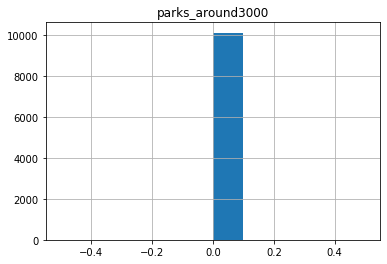

In [50]:
data[data['parks_nearest'].isna()].hist('parks_around3000')

In [51]:
data[data['parks_nearest'].isna()].groupby('parks_around3000').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
parks_around3000,,,,,,,,,,,,,,,,,,,,,
0.0,10102,10102,10102,10102,10102,6267,10102,9399,10102,10102,...,10102,9229,10102,10102,10102,10102,0,10102,4286,8931


In [52]:
data[data['ponds_nearest'].isna()].groupby('ponds_around3000').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_nearest,days_exposition
ponds_around3000,,,,,,,,,,,,,,,,,,,,,
0.0,9071,9071,9071,9071,9071,5829,9071,8486,9071,9071,...,9071,8352,9071,9071,9071,9071,9071,3255,0,7971


No wonder we have missing data in 'parks_nearest' and 'ponds_nearest' - there are simply no nearest pond or park for the ads in question. The most reasonable thing to leave it as it is just mark the values with '-1' like we did before when the city distance was unknown.

In [53]:
data['ponds_nearest'].fillna(-1, inplace=True)
data['parks_nearest'].fillna(-1, inplace=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23630 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23630 non-null int64
last_price              23630 non-null float64
total_area              23630 non-null float64
first_day_exposition    23630 non-null object
rooms                   23630 non-null int64
ceiling_height          14471 non-null float64
floors_total            23630 non-null float64
living_area             21744 non-null float64
floor                   23630 non-null int64
is_apartment            23630 non-null bool
studio                  23630 non-null bool
open_plan               23630 non-null bool
kitchen_area            21370 non-null float64
balcony                 23630 non-null float64
locality_name           23630 non-null object
airports_nearest        23630 non-null float64
cityCenters_nearest     23630 non-null float64
parks_around3000        23630 non-null float64
parks_nearest           23630 non-null float64
ponds_around300

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f386929a990>]],
      dtype=object)

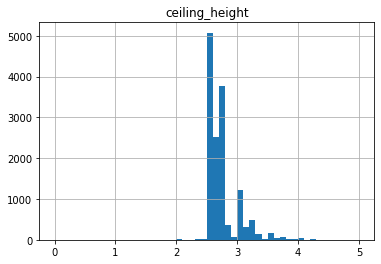

In [55]:
data.hist('ceiling_height', bins=50, range=(0,5))

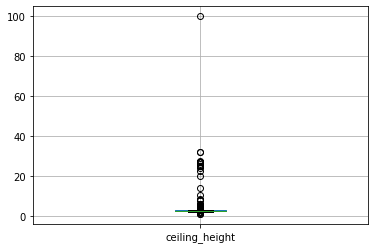

In [56]:
data.boxplot('ceiling_height')

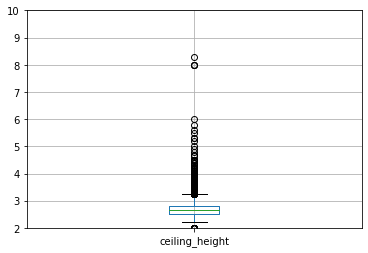

In [57]:
plt.ylim(2,10)
data.boxplot('ceiling_height')
plt.show()

In [58]:
data[~data['ceiling_height'].isna()].query('not 1.9 < ceiling_height < 10').shape

(28, 22)

In [59]:
data[~data['ceiling_height'].isna()].query('not 1.9 < ceiling_height < 10').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Gatchina,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,False,...,8.0,0.0,Volkhov,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,False,...,7.0,1.0,Saint Peterburg,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,False,...,NaN,2.0,Murino village,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,0.0,Saint Peterburg,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0


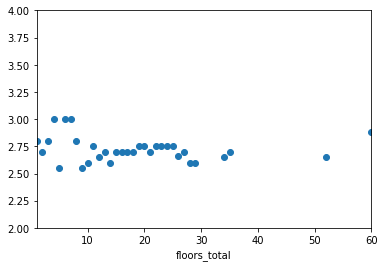

In [60]:
data.groupby('floors_total')['ceiling_height'].median().plot(ylim=(2,4), style='o')

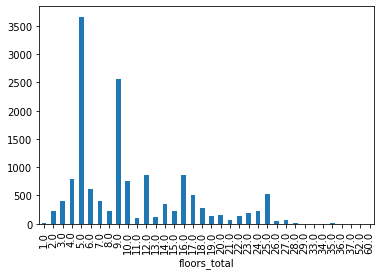

In [61]:
data.groupby('floors_total')['ceiling_height'].count().plot(kind='bar')

More then 1/3 of the records missing the ceiling height data. On one hand it looks pretty easy to fill it with median data or for better result with median data per floors_total parameter (reasonable because of typical constraction back in the USSR times and most of residential buildings in Saint Petersburg were built in those days). But on the other hand people more likely mention the 'ceiling height' in the ad if the height is high. Thus we don't like loosing the information of 'ceiling height' was provided or not.<br>
From the boxplots above we can see outliers in ceiling height values. There are 28 records with ceiling height less then 1.9m or more then 10m. Those outliers almost surely are some errors in data and we going to consider them as missing values too.<br>
In order to not loosing any usefull information we'll add a boolean column 'ceiling_info_provided' that will be True if we have data in 'ceiling_height' column and False in case of outliers or missing values. After that we'll replace missing values with median values grouping by floars_total.

In [62]:
data.loc[data[~data['ceiling_height'].isna()].query('not 1.9 < ceiling_height < 10').index, 'ceiling_height'] = np.nan

In [63]:
data[~data['ceiling_height'].isna()].query('not 1.9 < ceiling_height < 10').shape

(0, 22)

In [64]:
data['ceiling_info_provided'] =  ~data['ceiling_height'].isna()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_info_provided
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,0.0,Saint Peterburg,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,True
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,2.0,Shushary village,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,False
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,0.0,Saint Peterburg,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,False
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,0.0,Saint Peterburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,False
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,0.0,Saint Peterburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,True


In [65]:
median_height = data['ceiling_height'].median()
ceiling_dict = (
    data
    .groupby('floors_total')['ceiling_height']
    .median()
    .fillna(median_height)
    .to_dict()
)

In [66]:
def fill_ceiling(row):
    if np.isnan(row['ceiling_height']):
        return ceiling_dict[row['floors_total']]
    return row['ceiling_height']

data['ceiling_height'] = data.apply(fill_ceiling, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23630 entries, 0 to 23698
Data columns (total 23 columns):
total_images             23630 non-null int64
last_price               23630 non-null float64
total_area               23630 non-null float64
first_day_exposition     23630 non-null object
rooms                    23630 non-null int64
ceiling_height           23630 non-null float64
floors_total             23630 non-null float64
living_area              21744 non-null float64
floor                    23630 non-null int64
is_apartment             23630 non-null bool
studio                   23630 non-null bool
open_plan                23630 non-null bool
kitchen_area             21370 non-null float64
balcony                  23630 non-null float64
locality_name            23630 non-null object
airports_nearest         23630 non-null float64
cityCenters_nearest      23630 non-null float64
parks_around3000         23630 non-null float64
parks_nearest            23630 non-null floa

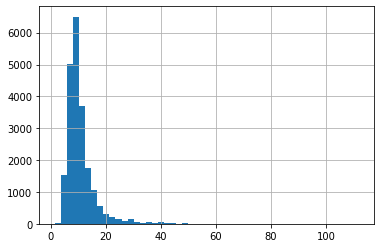

In [67]:
data['kitchen_area'].hist(bins=50)

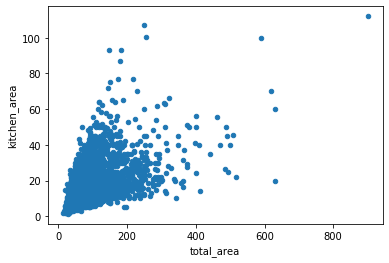

In [68]:
data.plot(x='total_area', y='kitchen_area', kind='scatter')

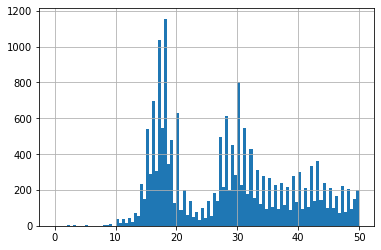

In [69]:
data['living_area'].hist(bins=100, range=(0,50))

In [70]:
data['living_area_ratio'] = data['living_area'] / data['total_area']

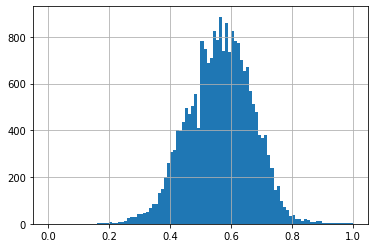

In [71]:
data['living_area_ratio'].hist(bins=100, range=(0,1.0))

As for missing values in columns 'kitchen_area' and 'living_area' it seems there is no good way to fill it without making data less reliable. We could fill living area based on the total area and living area ratio which is bell-shape with mean around 58% but the main reason of providing the data of living_area is to show what exactly the ratio is. We better avoid filling these values unless it's absolutely neccesary later.<br>
We have even less clues to how to fill the missing 'kitchen_area'. As we can see from the scatter plot above even if there is positive correlation between total area and kitchen area the variance is far too high for making reasonable evaluations of kitchen area based on total area. <br>
For these to parameters we'll follow directions of the task description and leave them blank. But to keep it inline with the replacement we did for distances and we'll use -1 instead of blank to keep the types of the columns numerical.

In [72]:
data['kitchen_area'].fillna(-1, inplace=True)
data['living_area'].fillna(-1, inplace=True)
data = data.drop('living_area_ratio', axis=1)

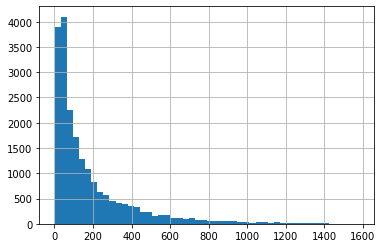

In [73]:
data['days_exposition'].hist(bins=50)

In [74]:
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [75]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

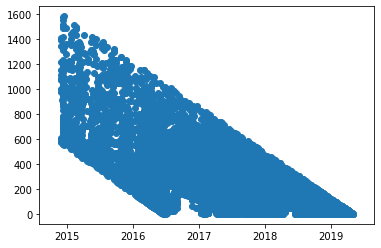

In [76]:
plt.scatter(x=data['first_day_exposition'], y=data['days_exposition'])

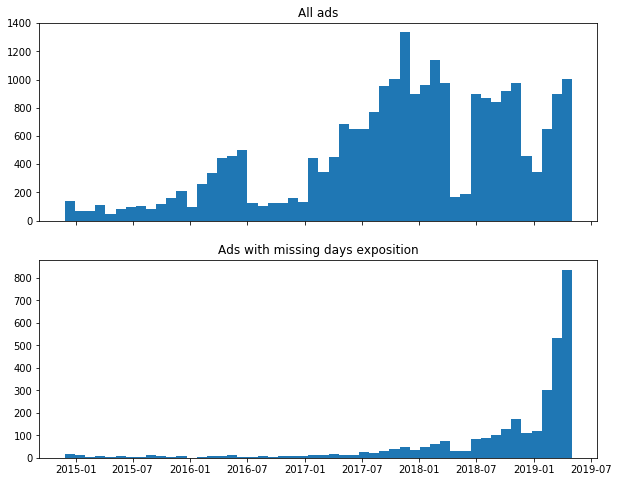

In [77]:
fig, axes = plt.subplots(2,1, sharex='col', figsize=(10,8))
axes[0].hist(data['first_day_exposition'], 50)
axes[0].set(title='All ads')
axes[1].hist(data[data['days_exposition'].isna()]['first_day_exposition'], 50)
axes[1].set(title='Ads with missing days exposition')
plt.show()


With days_exposition we have a dilemma. From the scatter plot above we may clearly see the period and the way the data was gathered. There is some starting point and prior it no ads was removed but we have ads placed earlier then the starting point. And there is the date when data stopped collecting. Let's call it finish point. No ads was removed or placed after the finish point.<br>
Actually there are two ways the data collectors (source) could deal with the value of 'days_exposition' for the ads still active on the finish date:
- use the finish date as the removal date and calculate days of exposition based on it
- leave the field empty (NaN) because it's unknown how long the ad will be exposed till its removal in the future

Our guess the second option was used at least histograms above support this suggestion: if first approach was used there should be spike in the last bin of the upper histogram and the missing values hist looks like reversed exponential distribution (roughly) - typical for modeling unknown time interval with common start. <br>
Thus we are going to stick with the suggestion that most of our missing data in the 'days_exposition' stands for still active ads at the finish date. But surely we should check our assumption with the source just in case.
Now we have the same two options as initial data collector. If we'll need to calculate for instance mean of the days exposition we don't want these data filled. But on the other hand if we'll need to now what ads were exposed on the cirtain date we definately want them filled.
So we'll proceed as before: **we'll add a new boolean column 'ad_removed' as an indicator if the ad was removed before the finish (False for missing values) date and fill the missing values in the 'days_exposition' column with the number of days between ad's first placement and the finish date** 

In [78]:
def is_removed(days_exposition):
    return not np.isnan(days_exposition)

data['ad_removed'] = data['days_exposition'].apply(is_removed)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_info_provided,ad_removed
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,Saint Peterburg,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,True,False
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,...,Shushary village,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,False,True
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,...,Saint Peterburg,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,False,True
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,-1.0,9,False,...,Saint Peterburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,False,True
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,Saint Peterburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,True,True


In [79]:
removal_dates = data[data['ad_removed']].apply(lambda row: row['first_day_exposition'] 
                                               + timedelta(days=row['days_exposition']), axis=1)
removal_dates.head(3)

1   2019-02-23
2   2017-02-28
3   2016-09-20
dtype: datetime64[ns]

In [80]:
removal_dates.max(), data['first_day_exposition'].max()

(Timestamp('2019-05-02 00:00:00'), Timestamp('2019-05-03 00:00:00'))

Well we have at least one ad posted on the date of cut off and last removal took place on the previous day. We don't want any negative values in the days_exposition column thus our finish date is 2019-05-03

In [81]:
finish_date = data['first_day_exposition'].max()

In [82]:
(finish_date - removal_dates.iloc[0]).days

69

In [83]:
def fill_days_exposition(row):
    if np.isnan(row['days_exposition']):
        return (finish_date - row['first_day_exposition']).days
    return row['days_exposition']

data['days_exposition'] = data.apply(fill_days_exposition, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_info_provided,ad_removed
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,Saint Peterburg,18863.0,16028.0,1.0,482.0,2.0,755.0,57.0,True,False
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,...,Shushary village,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,False,True
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,...,Saint Peterburg,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,False,True
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,-1.0,9,False,...,Saint Peterburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,False,True
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,Saint Peterburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,True,True


In [84]:
data.isna().any()

total_images             False
last_price               False
total_area               False
first_day_exposition     False
rooms                    False
ceiling_height           False
floors_total             False
living_area              False
floor                    False
is_apartment             False
studio                   False
open_plan                False
kitchen_area             False
balcony                  False
locality_name            False
airports_nearest         False
cityCenters_nearest      False
parks_around3000         False
parks_nearest            False
ponds_around3000         False
ponds_nearest            False
days_exposition          False
ceiling_info_provided    False
ad_removed               False
dtype: bool

#### Data types

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23630 entries, 0 to 23698
Data columns (total 24 columns):
total_images             23630 non-null int64
last_price               23630 non-null float64
total_area               23630 non-null float64
first_day_exposition     23630 non-null datetime64[ns]
rooms                    23630 non-null int64
ceiling_height           23630 non-null float64
floors_total             23630 non-null float64
living_area              23630 non-null float64
floor                    23630 non-null int64
is_apartment             23630 non-null bool
studio                   23630 non-null bool
open_plan                23630 non-null bool
kitchen_area             23630 non-null float64
balcony                  23630 non-null float64
locality_name            23630 non-null object
airports_nearest         23630 non-null float64
cityCenters_nearest      23630 non-null float64
parks_around3000         23630 non-null float64
parks_nearest            23630 non-n

In [86]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_info_provided,ad_removed
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,Saint Peterburg,18863.0,16028.0,1.0,482.0,2.0,755.0,57.0,True,False
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,...,Shushary village,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,False,True
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,...,Saint Peterburg,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,False,True
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,-1.0,9,False,...,Saint Peterburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,False,True
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,Saint Peterburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,True,True


In [87]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'ceiling_info_provided',
       'ad_removed'],
      dtype='object')

We actually don't need so much precision in the 'last_price' let it be in thousand rubles instead of rubles.

In [88]:
data['last_price'] = data['last_price'] / 1000
columns_to_int = ['last_price','floors_total','balcony', 
                  'airports_nearest', 'cityCenters_nearest', 
                  'parks_around3000', 'parks_nearest', 'ponds_around3000', 
                  'ponds_nearest', 'days_exposition']
for col in columns_to_int:
    data[col] = data[col].apply(int)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23630 entries, 0 to 23698
Data columns (total 24 columns):
total_images             23630 non-null int64
last_price               23630 non-null int64
total_area               23630 non-null float64
first_day_exposition     23630 non-null datetime64[ns]
rooms                    23630 non-null int64
ceiling_height           23630 non-null float64
floors_total             23630 non-null int64
living_area              23630 non-null float64
floor                    23630 non-null int64
is_apartment             23630 non-null bool
studio                   23630 non-null bool
open_plan                23630 non-null bool
kitchen_area             23630 non-null float64
balcony                  23630 non-null int64
locality_name            23630 non-null object
airports_nearest         23630 non-null int64
cityCenters_nearest      23630 non-null int64
parks_around3000         23630 non-null int64
parks_nearest            23630 non-null int64
po

### Conclusion

#### We defined and dealt with missing data in the dataset:
1. balcony:
    - We suggest that missing value in balcony column most likely stands for 'no balcony'. Thus missing values was replaced with 0
    - the cause - data wasn't provided in ads
2. is_apartment:
    - We suggest that missing value in this column most likely stands for regular apartment on sale. Our reasoning based on the fact that legal term 'apartment' is rather new and relatively rare and apriori apartment on sale should be regular. Thus missing values was replaced with False
    - The cause - data wasn't provided in ads
    - Note - there are just 50 True records in the column, so it's not really informative parameter anyway. Suggest total removal from the dataset later.
3. locality_name:
    - We detected 49 records missing values in this column
    - We deleted 8 records with no data in 'cityCenters_nearest' cause we have no idea how to restore locality for these apartments and locality is crucial parameter for house pricing
    - For the rest we filled the missing values with 'Saint Petersburg' where 'cityCenter_nearest' less then 18000 and with "Unknown region" otherwise. The boundary was clear from histograms we draw
    - the cause - most likely human errors while placing adds
4. floors_total:
    - We detected 86 records missing values in this column. We found no specific pattern with these missing data so filled it with medians of the data with the same floor value.
    - the cause - most likely human errors while placing adds
5. cityCenters_nearest:
    - We detected 5511 records missing values in this column
    - For just one record where we had airports_nearest value we filled the missing value based on locality_name and averaging the distances to the city center of ads with close airports_nearest values
    - We removed from the dataset 61 records that had locality_name Saint Petersburg and missing citiCenters_nearest data. The distance to city center is crucial parameter for big cities and we have no means to define it. The data on Saint Petersburg is big enough without these confusing records
    - For the rest 5449 records we mark the data as missing with -1 so we can filter them out later if needed
    - For the same 5449 records the dataset has missing values in columns 'airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000' and 'ponds_nearest' so we marked them with -1 too to indicate missing value for later use
    - the cause - some missing values occurs due to human ot technical errors but in most cases the lack of the data means that for some villages it's no difference what distance from exact house to Saint Petersburg center or to nearest pond or park. The locality name tells more then enough for the potential buyers and that's why there is no data in the ads. 
6. airports_nearest
    - There still are 24 records missing 'airports_nearest' values. All of them are in Saint Petersburg. 
    - We filled them with the mean of the same 'cityCenters_nearest' or with the mean of close range if there is no records with the same meaning.
    - the cause - some kind of human or technical error
7. park_nearest and pond_nearest:
    - There are a lot of missing values here but all of them occurs due to no pond/park is around.
    - We filled them with -1 as before
    - the cause - no meaningfull value possible here
8. ceiling_height:
    - There are more then 9000 records with missing ceiling height values in the data set
    - the data where ceiling height less then 1.9m or above 10m we considered as outliers due to some technical error and dealt with them like with the other missing values
    - Before filling the data of ceiling height we created a column 'ceiling_info_provided' to keep this information for later use
    - we filled the missing values with median of the data with the same 'total_floor' value or median of the full dataset in case there is no valid data for the same 'total floor'
    - the cause - most likely this parameter is optional and some ads don't have it
9. kitchen_area, living_area:
    - We detected 2260 missing values in 'kitchen_area' and 1886 in living area
    - As we can't reasonably suggest what the values actually are we treated them as before with marking it with -1 value
    - the cause - human error or lack of the knowledge on the sell side.
10. days_exposition:
    - We detected 3150 records with missing values in this column
    - the cause - based on our exploration we suggested that most of these ads were still active at the day of data collecting.
    - we add column 'ad_removed' indicating if in the dataset exist the actual date of ad removal (missing values stands for False)
    - 'days_exposed' filled with the number of days from the 'first_day_exposition' till the maximum date of 'first_day_exposition'
<br> <br>
#### We converted the data types for columns:
- 'first_day_exposition' to datetime
- 'floors_total','balcony','airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition' to integer
- 'last_price' we express in thousands rubles now

### Step 3. Make calculations and add them to the table

In [90]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']
# as prices are in Rubles we don't need float here
data['price_per_square_meter'] = data['price_per_square_meter'].apply(int)
data['day_of_publication'] = data['first_day_exposition'].dt.dayofweek
data['month_of_publication'] = data['first_day_exposition'].dt.month
data['year_of_publication'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_info_provided,ad_removed,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication
0,20,13000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482,2,755,57,True,False,120,3,3,2019
1,7,3350,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,-1,0,-1,81,False,True,82,1,12,2018
2,10,5196,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,90,2,574,558,False,True,92,3,8,2015
3,0,64900,159.0,2015-07-24,3,2.60,14,-1.0,9,False,...,84,3,234,424,False,True,408,4,7,2015
4,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112,1,48,121,True,True,100,1,6,2018


In [91]:
def get_floor_group(row):
    if row['floor'] == 1:
        return 'first'
    if row['floor'] == row['floors_total']:
        return 'last'
    return 'other'
data['floor_group'] = data.apply(get_floor_group, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,ceiling_info_provided,ad_removed,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,floor_group
0,20,13000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,57,True,False,120,3,3,2019,other
1,7,3350,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,0,-1,81,False,True,82,1,12,2018,first
2,10,5196,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,2,574,558,False,True,92,3,8,2015,other
3,0,64900,159.0,2015-07-24,3,2.60,14,-1.0,9,False,...,3,234,424,False,True,408,4,7,2015,other
4,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121,True,True,100,1,6,2018,other


In [92]:
def uniform_missing(ratio):
    if ratio < 0:
        return -1
    return ratio

data['living_area_ratio'] = (data['living_area'] / data['total_area']).apply(uniform_missing)
data['kitchen_area_ratio'] = (data['kitchen_area'] / data['total_area']).apply(uniform_missing)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,ceiling_info_provided,ad_removed,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,floor_group,living_area_ratio,kitchen_area_ratio
0,20,13000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,57,True,False,120,3,3,2019,other,0.472222,0.231481
1,7,3350,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,81,False,True,82,1,12,2018,first,0.460396,0.272277
2,10,5196,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,558,False,True,92,3,8,2015,other,0.612500,0.148214
3,0,64900,159.0,2015-07-24,3,2.60,14,-1.0,9,False,...,424,False,True,408,4,7,2015,other,-1.000000,-1.000000
4,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121,True,True,100,1,6,2018,other,0.320000,0.410000


### Conclusion

We added the columns with aggregated values that we were specifically asked to add in the task description.
<br><br>
In the columns 'living_area_ratio' and 'kitchen_area_ratio' value -1 correspondes to missing values in the columns 'living_area' and 'kitchen area'.

### Step 4. Conduct exploratory data analysis and follow the instructions below:

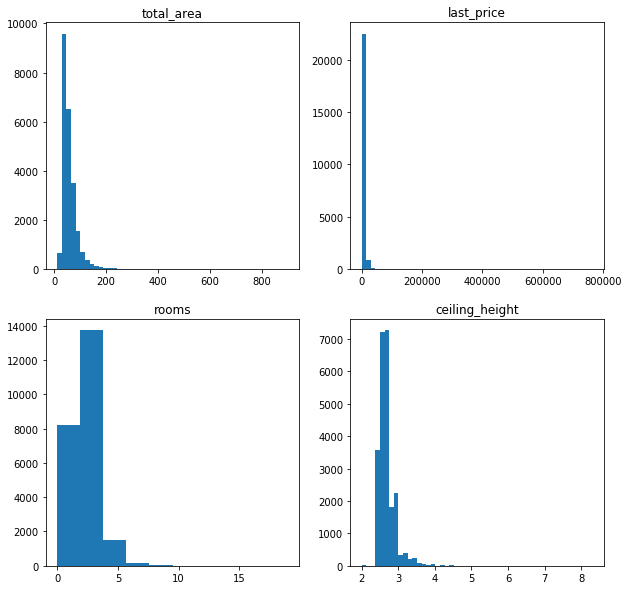

In [93]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
bins = [50, 50, 10, 50]
fig, axes = plt.subplots(2,2, figsize=(10,10))
for i in range(len(columns)):
    axes[i//2, i%2].hist(data[columns[i]], bins=bins[i])
    axes[i//2, i%2].set(title=columns[i])
plt.show()

Hard to see anything because of outlier we obviously have in every parameter.

In [94]:
outlier_filter = 'total_area > 200 or last_price > 30000 or rooms > 7 or ceiling_height > 4 or ceiling_height < 2.25'
data.query(outlier_filter).shape

(452, 31)

In [95]:
clear_data = data.drop(data.query(outlier_filter).index)

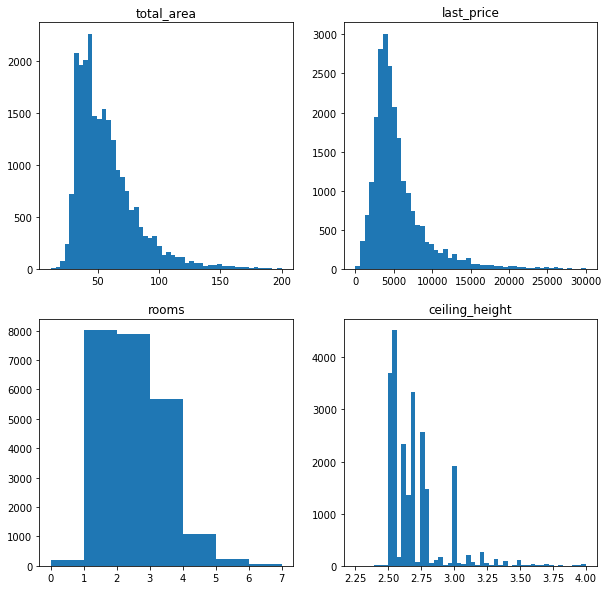

In [96]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
bins = [50, 50, 7, 50]
fig, axes = plt.subplots(2,2, figsize=(10,10))
for i in range(len(columns)):
    axes[i//2, i%2].hist(clear_data[columns[i]], bins=bins[i])
    axes[i//2, i%2].set(title=columns[i])
plt.show()

However the ceiling height has a lot of constructed values. Let's look at the real histogram:

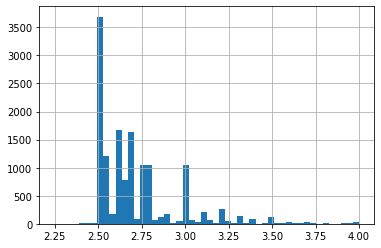

In [97]:
clear_data[clear_data['ceiling_info_provided']]['ceiling_height'].hist(bins=50)
plt.show()

Let's take a look at the time it's taken to sell the apartment. For this task we don't need ads that wasn't removed so we'll use our filter column 'ad_removed'

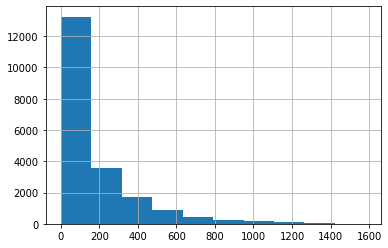

In [98]:
data[data['ad_removed']]['days_exposition'].hist()
plt.show()

Outliers hiding the things again. Let's take a look at the boxplot

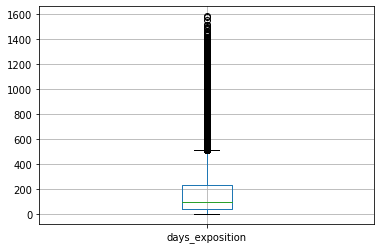

In [99]:
data[data['ad_removed']].boxplot('days_exposition')

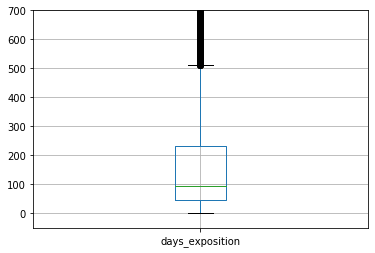

In [100]:
plt.ylim(-50, 700)
data[data['ad_removed']].boxplot('days_exposition')
plt.show()

In [101]:
data[data['ad_removed']]['days_exposition'].describe()

count    20486.000000
mean       180.937811
std        219.807425
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

We can see that a lot of outliers with high exposition length up to 1600 days moved the mean to to almost 181 day whereas median shows more likely 95 days to expect till the deal is closed <br><br>
It's all clear with high values, but what of those ads with just one day on show. Let's take a closer look at lower 25% of the data:

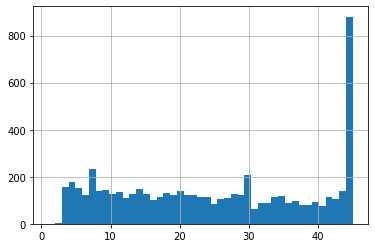

In [102]:
data.query('ad_removed and days_exposition <= 45')['days_exposition'].hist(bins=45)

All good with small value but what of the spike on 45 days?

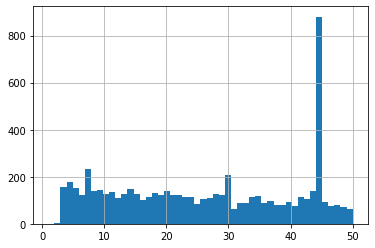

In [103]:
data.query('ad_removed and days_exposition <= 50')['days_exposition'].hist(bins=50)

That's strange. My best guess is the rules of the marketplace where ads were published set 45 days period of exposure per first payment and if the ad wasn't removed and no payment for prolongation was recieved the ad removed automatically. Let's take a look at the longer period if there are more of such spikes?

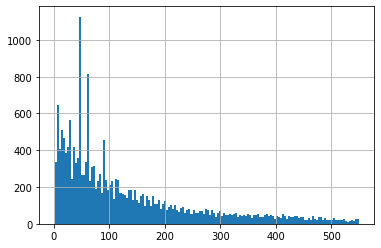

In [104]:
data.query('ad_removed and days_exposition <= 550')['days_exposition'].hist(bins=150)

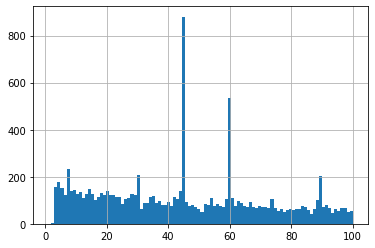

In [105]:
data.query('ad_removed and days_exposition <= 100')['days_exposition'].hist(bins=100)

Bingo! There are two clear spikes 45 days and 60 days. Two more less significant at 30 and 90 days. Obviousely they corresponds to paid periods of exposure. We almost sure of it but really it shouldn't be hard to check it with data source and possibly if we are lucky even get the list of automatically removed ads. Definately should be done if we want to analize average time it usually takes to complete a sale.

In [106]:
auto_list = [45,60]
without_auto_query = ('ad_removed and days_exposition not in @auto_list')
data.query(without_auto_query)['days_exposition'].describe()

count    19071.000000
mean       190.603115
std        224.819562
min          1.000000
25%         42.000000
50%        108.000000
75%        249.500000
max       1580.000000
Name: days_exposition, dtype: float64

Well those outliers still hiding the picture

In [107]:
without_auto_and_outliers_query = ('ad_removed and days_exposition not in @auto_list and days_exposition < 730')
data.query(without_auto_and_outliers_query)['days_exposition'].describe()

count    18320.000000
mean       158.758188
std        159.605582
min          1.000000
25%         40.000000
50%        101.000000
75%        222.000000
max        729.000000
Name: days_exposition, dtype: float64

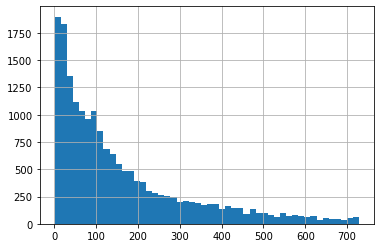

In [108]:
data.query(without_auto_and_outliers_query)['days_exposition'].hist(bins=50)

Now it looks good. Actually it looks like exponential distribution (like it really should) but with much havier tail. Actually if we want to continue investigation I'd suggest trying to model it like sum of two exp with different parameters: one regular and the other with really low lambda. The second distribution stands for those ads where a seller not in harry or just monitoring the bids not actually selling. If it won't work we can try gamma or some such. The spikes shouldn't be just excluded but replaced with mean of neighbours for better modeling. But all this is beyond the scope of the task of this project.
<br><br>
After exploring the 'days_exposition' parameter we may use for different evaluation different ststistics - most useful should be mean and median after removal spikes and outliers (we consider outlier anything longer then 2 years) i.e. mean = 159 median = 101
<br><br>
As we said before we consider as outliers any ad staying on exposition more then 730 days. Although any number above 550 we can consider that sale have taken extreamly long time.
any time below 40 days may be considered as rather quick deal and rather long if it above 222 days

Let's remove new discovered outliers from our clear_data

In [109]:
clear_data.shape

(23178, 31)

In [110]:
clear_data = clear_data.drop(clear_data.query('days_exposition > 730').index)
clear_data.shape

(22275, 31)

#### Influence on the appartment's value

In [111]:
clear_data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'ceiling_info_provided',
       'ad_removed', 'price_per_square_meter', 'day_of_publication',
       'month_of_publication', 'year_of_publication', 'floor_group',
       'living_area_ratio', 'kitchen_area_ratio'],
      dtype='object')

In [112]:
columns_to_study = ['total_area', 'rooms', 'cityCenters_nearest', 'last_price']
data_tmp = clear_data.query('cityCenters_nearest > 0')
data_tmp[columns_to_study].corr()

,total_area,rooms,cityCenters_nearest,last_price
total_area,1.000000,0.792220,-0.215961,0.813623
rooms,0.792220,1.000000,-0.151638,0.529862
cityCenters_nearest,-0.215961,-0.151638,1.000000,-0.344534
last_price,0.813623,0.529862,-0.344534,1.000000


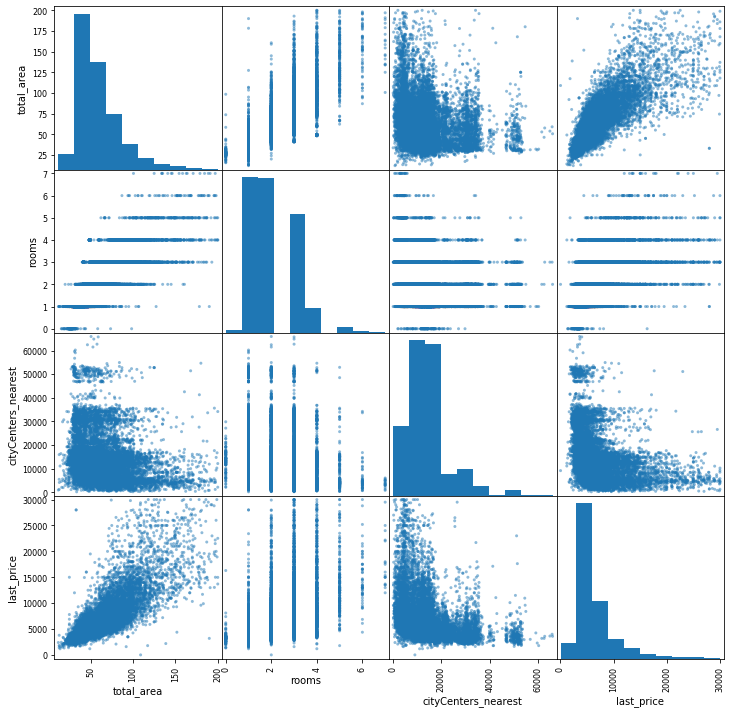

In [113]:
pd.plotting.scatter_matrix(data_tmp[columns_to_study], figsize=(12,12))
plt.show()

                           rooms  cityCenters_nearest  price_per_square_meter
rooms                   1.000000            -0.151638               -0.118528
cityCenters_nearest    -0.151638             1.000000               -0.380388
price_per_square_meter -0.118528            -0.380388                1.000000


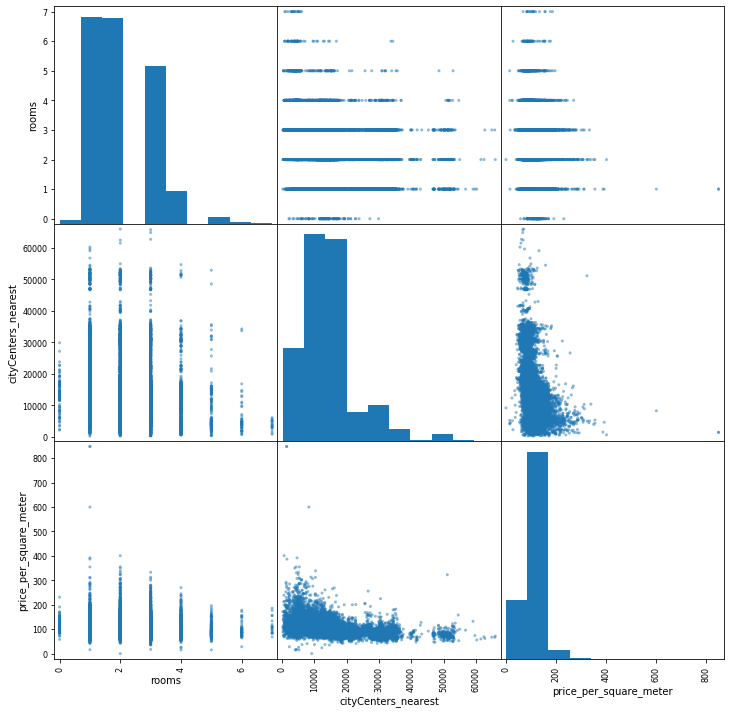

In [114]:
columns_to_study = ['rooms', 'cityCenters_nearest', 'price_per_square_meter']
print(data_tmp[columns_to_study].corr())
pd.plotting.scatter_matrix(data_tmp[columns_to_study], figsize=(12,12))
plt.show()

Funny story - number of rooms has now slightly negative influence, actually no influence. It was all due to high correlation between number of rooms and total area. 
<br><br> 
Distance to the center has slightly higher negative correlation but it's not really significant with the number below 0.4

Still have some outliers in price_per_square_meter column. Let's remove them from clear_data

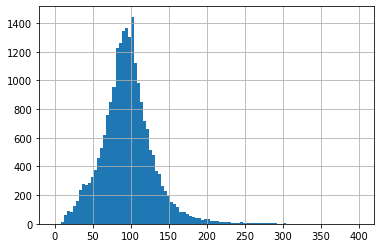

In [115]:
clear_data['price_per_square_meter'].hist(bins=100, range=(0,400))

In [116]:
clear_data.query('price_per_square_meter > 300').shape

(23, 31)

In [117]:
clear_data = clear_data.drop(clear_data.query('price_per_square_meter > 300').index)

                           rooms  cityCenters_nearest  price_per_square_meter
rooms                   1.000000            -0.152328               -0.121816
cityCenters_nearest    -0.152328             1.000000               -0.398295
price_per_square_meter -0.121816            -0.398295                1.000000


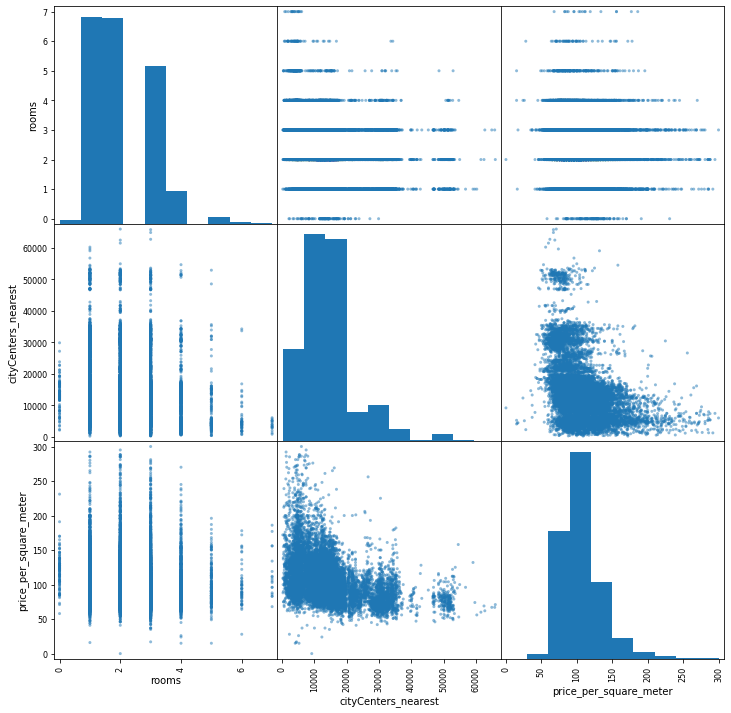

In [118]:
data_tmp = clear_data.query('cityCenters_nearest > 0')
columns_to_study = ['rooms', 'cityCenters_nearest', 'price_per_square_meter']
print(data_tmp[columns_to_study].corr())
pd.plotting.scatter_matrix(data_tmp[columns_to_study], figsize=(12,12))
plt.show()

                        cityCenters_nearest  price_per_square_meter
cityCenters_nearest                1.000000               -0.338771
price_per_square_meter            -0.338771                1.000000


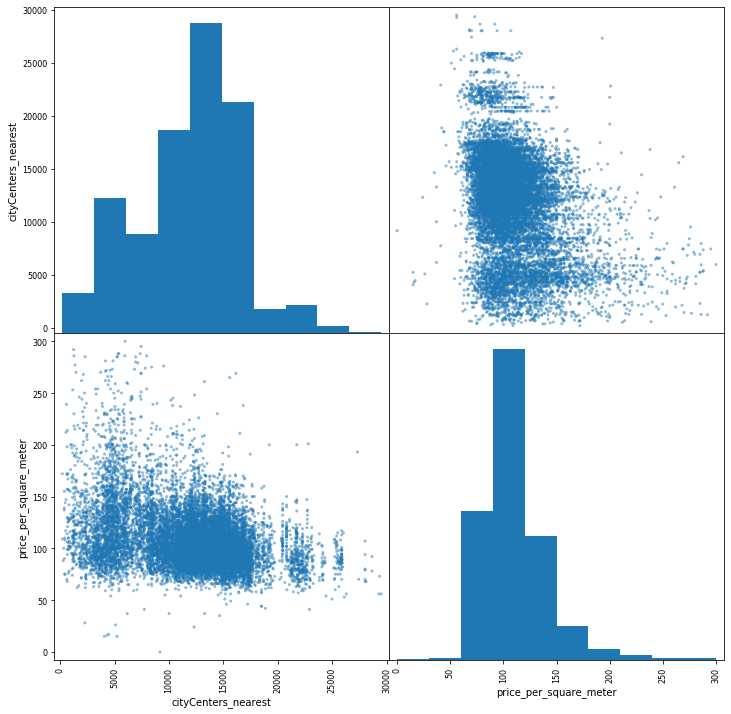

In [119]:
data_tmp = data_tmp.query('locality_name == "Saint Peterburg"')
columns_to_study = ['cityCenters_nearest', 'price_per_square_meter']
print(data_tmp[columns_to_study].corr())
pd.plotting.scatter_matrix(data_tmp[columns_to_study], figsize=(12,12))
plt.show()

Well still just a weak correlation with distance to the center. 
<br><br> 
Let's take a look at floor groups parameter. It's a categorical one thus a little different aproach needed

In [120]:
clear_data.groupby('floor_group')[['last_price', 'price_per_square_meter']].describe()

last_price                                                   \
                 count         mean          std    min     25%     50%   
floor_group                                                               
first           2753.0  4444.049037  2933.946333  430.0  2750.0  3850.0   
last            3076.0  5350.416125  4146.434716   12.0  2950.0  4200.0   
other          16423.0  5807.486208  3765.006108  450.0  3580.0  4750.0   

                              price_per_square_meter                        \
                 75%      max                  count       mean        std   
floor_group                                                                  
first        5300.00  29500.0                 2753.0  79.835089  31.365989   
last         6291.25  29990.0                 3076.0  87.052991  36.455146   
other        6750.00  30000.0                16423.0  99.386044  32.695067   

                                             
              min   25%   50%    75%    max  
floor_group                                  
first         9.0  60.0  80.0   97.0  286.0  
last          0.0  63.0  86.0  106.0  276.0  
other        10.0  80.0  97.0  116.0  300.0

We have clear differences in mean and median both. Lowest for the first floor, next for the second floor and other is the best choice for value of the apartment. Let's take a look on the boxplot

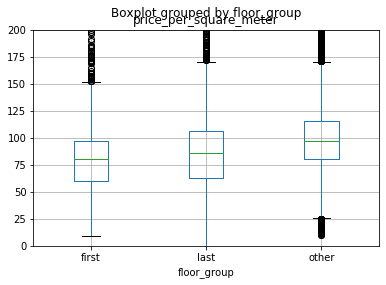

In [121]:
clear_data.boxplot(column=['price_per_square_meter'], by='floor_group')
plt.ylim(0,200)
plt.show()

In [122]:
clear_data.query('price_per_square_meter < 1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,ceiling_info_provided,ad_removed,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,floor_group,living_area_ratio,kitchen_area_ratio
8793,7,12,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,8,True,True,0,2,3,2019,last,0.293578,0.37156


That's weird record - maybe price wasn't in rubles. Remove it from clear data as probable error:

In [123]:
clear_data = clear_data.drop(clear_data.query('price_per_square_meter < 1').index)

day_of_publication to price per square meter correlation: -0.016637106518893
month_of_publication to price per square meter correlation: -0.009097775082272335
year_of_publication to price per square meter correlation: 0.07047727562262038


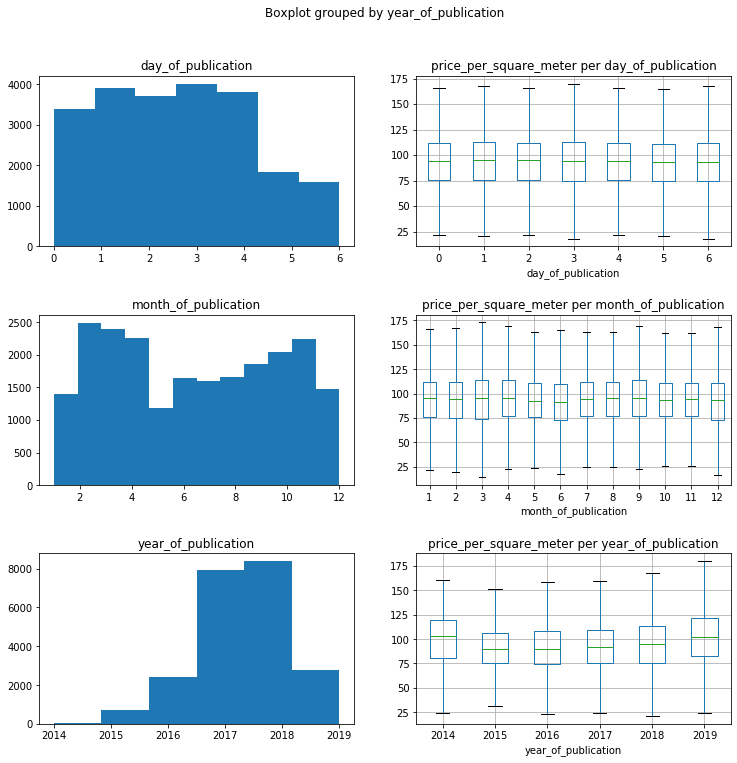

In [124]:
columns_to_study = ['day_of_publication', 'month_of_publication', 'year_of_publication']
bins = [7, 12, 6]
fig, axes = plt.subplots(3,2, figsize=(12,12))
fig.subplots_adjust(wspace=.2, hspace=.4)
for i, feature in enumerate(columns_to_study):
    print('{} to price per square meter correlation:'.format(feature)
          , clear_data[feature].corr(clear_data['price_per_square_meter']))
    axes[i,0].hist(clear_data[feature], bins=bins[i])
    axes[i,0].set(title=feature)
    
    clear_data.boxplot(column='price_per_square_meter'
                       , by=feature, ax=axes[i,1], showfliers=False)
    axes[i,1].set(title='price_per_square_meter per {}'.format(feature))
plt.show()

From the correlations above we can see that there is no correlation between price and day of the week or month when the ad was published. But we can see a week positive correlation between years and prices and boxplots surely confirm it. With exception of 2014 (due to small amount of data or due to crises we had in Russia in late 2014 couldn't say) the prices keep rising slightly indicating overall rise of real estate prices.
<br><br>
Another pattern could be seen from the histograms: There are less ads oublished on weekend (days 5 and 6 on the hist) and during the summer time or around christmas holidays.
<br> On the last histogram we can see constant rise of publications from year to year (2019 isn't full year - we remember it because the finish date we found earlier was in july 2019). It reflect rise of the popularity of the platform most likely.

In [125]:
top10_localities = list(
    clear_data
    .groupby('locality_name')
    .count()
    .sort_values('last_price', ascending=False)
    .head(10).index
)
top10_localities

['Saint Peterburg',
 'Murino village',
 'Shushary village',
 'Vsevolozhsk',
 'Pushkin',
 'Kolpino',
 'Pargolovo village',
 'Gatchina',
 'Kudrovo village ',
 'Vyborg']

In [126]:
data_tmp = clear_data.query('locality_name in @top10_localities')
data_tmp.groupby('locality_name')['price_per_square_meter'].mean().sort_values(ascending=False)

locality_name
Saint Peterburg      109.302192
Pushkin              102.394203
Kudrovo village       92.117857
Pargolovo village     89.742138
Murino village        85.282528
Shushary village      78.149184
Kolpino               74.799392
Gatchina              68.415808
Vsevolozhsk           66.742706
Vyborg                57.845133
Name: price_per_square_meter, dtype: float64

The highest average price per square meter in Saint Peterburg <br>
The lowest in Vyborg

#### Detect the downtown

In [127]:
data_tmp = (clear_data.query('locality_name == "Saint Peterburg"')
            [['cityCenters_nearest', 'price_per_square_meter', 'last_price']].copy())
data_tmp.shape

(14643, 3)

In [128]:
data_tmp.head()

,cityCenters_nearest,price_per_square_meter,last_price
0,16028,120,13000
2,13933,92,5196
4,8098,100,10000
7,11634,110,7915
9,15008,88,5400


In [129]:
data_tmp['km_to_center'] = (data_tmp['cityCenters_nearest'] / 1000).apply(int)
data_tmp.head()

,cityCenters_nearest,price_per_square_meter,last_price,km_to_center
0,16028,120,13000,16
2,13933,92,5196,13
4,8098,100,10000,8
7,11634,110,7915,11
9,15008,88,5400,15


In [130]:
price_by_dist = (data_tmp.groupby('km_to_center')['last_price']
                 .mean())
price_by_dist.head()

km_to_center
0    11033.491803
1    11066.592391
2    10225.914062
3     9570.501094
4    10624.131406
Name: last_price, dtype: float64

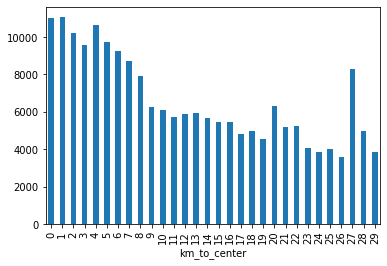

In [131]:
price_by_dist.plot(y='last_price',kind='bar')

With exception of some expensive district at 27 km from the center we clearly can see price drop after 8 km from center. So for this research we may consider anything with less or equal to 8 kilometers to city center as the downtown of Saint Peterburg

In [132]:
downtown_data = clear_data.query('locality_name == "Saint Peterburg"and cityCenters_nearest < 9000')
downtown_data.shape

(3727, 31)

In [133]:
columns_to_study = ['total_area', 'rooms', 'cityCenters_nearest', 'last_price']
downtown_data[columns_to_study].corr()

,total_area,rooms,cityCenters_nearest,last_price
total_area,1.000000,0.795403,-0.232856,0.767536
rooms,0.795403,1.000000,-0.244268,0.483070
cityCenters_nearest,-0.232856,-0.244268,1.000000,-0.161555
last_price,0.767536,0.483070,-0.161555,1.000000


                           rooms  cityCenters_nearest  price_per_square_meter
rooms                   1.000000            -0.244268               -0.239490
cityCenters_nearest    -0.244268             1.000000               -0.023624
price_per_square_meter -0.239490            -0.023624                1.000000


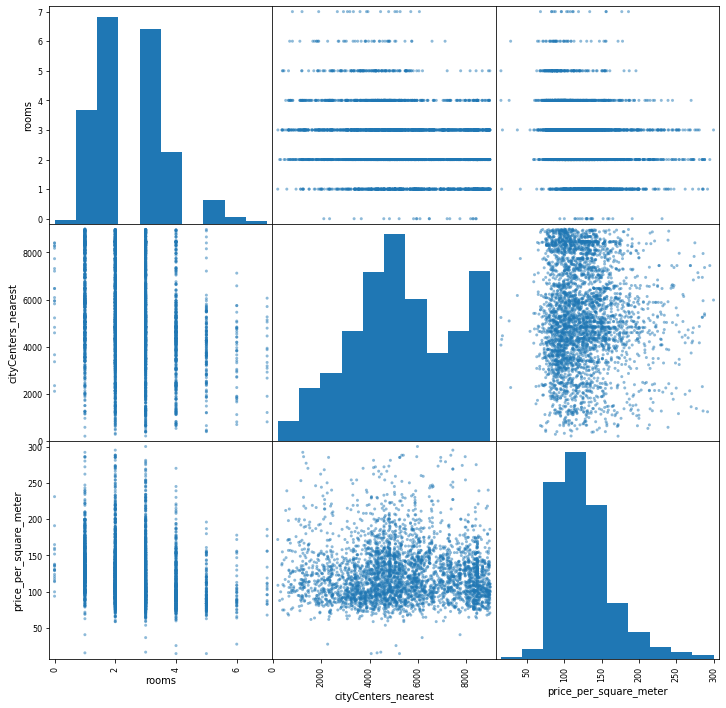

In [134]:
columns_to_study = ['rooms', 'cityCenters_nearest', 'price_per_square_meter']
print(downtown_data[columns_to_study].corr())
pd.plotting.scatter_matrix(downtown_data[columns_to_study], figsize=(12,12))
plt.show()

So far the only difference from the total dataset is that correlation between price and distance to the center disappear completely. Sounds solid because all the apartments in question are already in the downtown so other factors should influence here

                           rooms  cityCenters_nearest  ceiling_height  \
rooms                   1.000000            -0.244268        0.268830   
cityCenters_nearest    -0.244268             1.000000       -0.320936   
ceiling_height          0.268830            -0.320936        1.000000   
price_per_square_meter -0.239490            -0.023624       -0.001627   

                        price_per_square_meter  
rooms                                -0.239490  
cityCenters_nearest                  -0.023624  
ceiling_height                       -0.001627  
price_per_square_meter                1.000000  


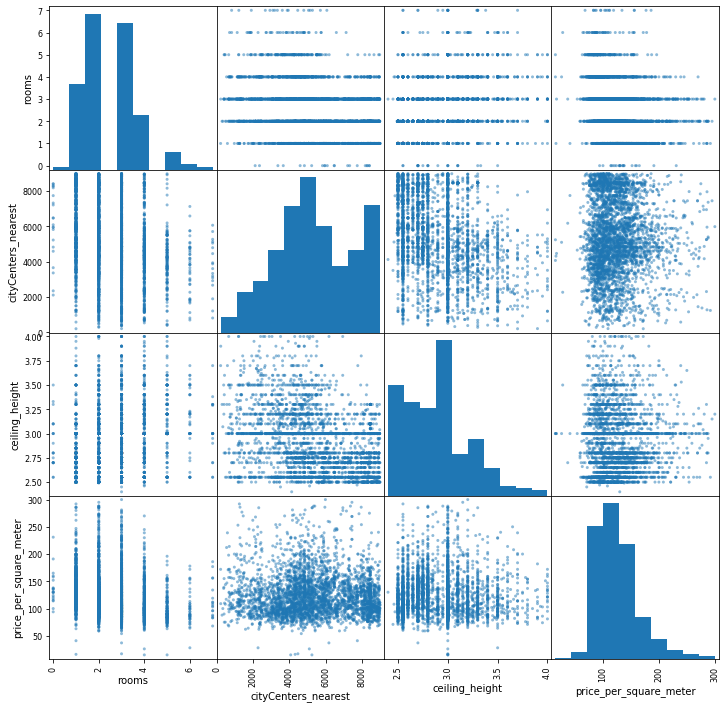

In [135]:
columns_to_study = ['rooms', 'cityCenters_nearest', 'ceiling_height', 'price_per_square_meter']
print(downtown_data[columns_to_study].corr())
pd.plotting.scatter_matrix(downtown_data[columns_to_study], figsize=(12,12))
plt.show()

In [136]:
downtown_data.groupby('floor_group')[[ 'price_per_square_meter']].mean()

,price_per_square_meter
floor_group,
first,112.105140
last,120.628289
other,128.486065


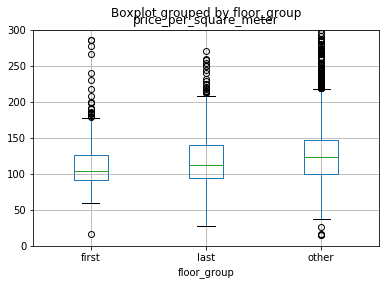

In [137]:
downtown_data.boxplot(column=['price_per_square_meter'], by='floor_group')
plt.ylim(0,300)
plt.show()

Same pattern as in the full dataset with floor group

day_of_publication to price per square meter correlation: -0.025060481221920883
month_of_publication to price per square meter correlation: -0.02739089998990509
year_of_publication to price per square meter correlation: 0.1116561043815621


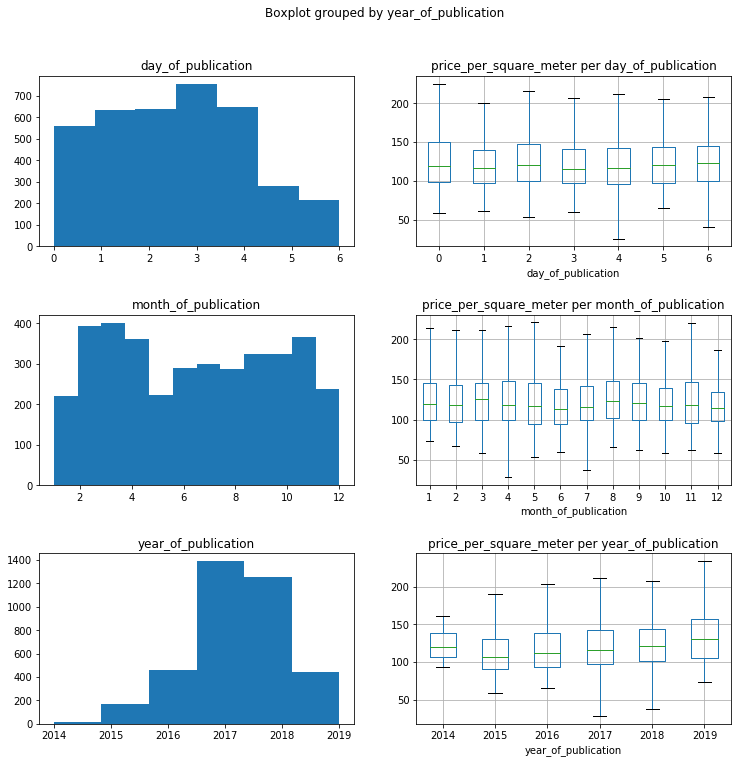

In [138]:
#Sorry for ugly copy paste - TODO make it with functions
columns_to_study = ['day_of_publication', 'month_of_publication', 'year_of_publication']
bins = [7, 12, 6]
fig, axes = plt.subplots(3,2, figsize=(12,12))
fig.subplots_adjust(wspace=.2, hspace=.4)
for i, feature in enumerate(columns_to_study):
    print('{} to price per square meter correlation:'.format(feature)
          , downtown_data[feature].corr(downtown_data['price_per_square_meter']))
    axes[i,0].hist(downtown_data[feature], bins=bins[i])
    axes[i,0].set(title=feature)
    
    downtown_data.boxplot(column='price_per_square_meter'
                       , by=feature, ax=axes[i,1], showfliers=False)
    axes[i,1].set(title='price_per_square_meter per {}'.format(feature))
plt.show()

The same patterns

Let's explore some more features:

In [139]:
downtown_data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'ceiling_info_provided',
       'ad_removed', 'price_per_square_meter', 'day_of_publication',
       'month_of_publication', 'year_of_publication', 'floor_group',
       'living_area_ratio', 'kitchen_area_ratio'],
      dtype='object')

                        parks_nearest  ponds_nearest  price_per_square_meter
parks_nearest                1.000000       0.078354                0.051717
ponds_nearest                0.078354       1.000000               -0.038551
price_per_square_meter       0.051717      -0.038551                1.000000


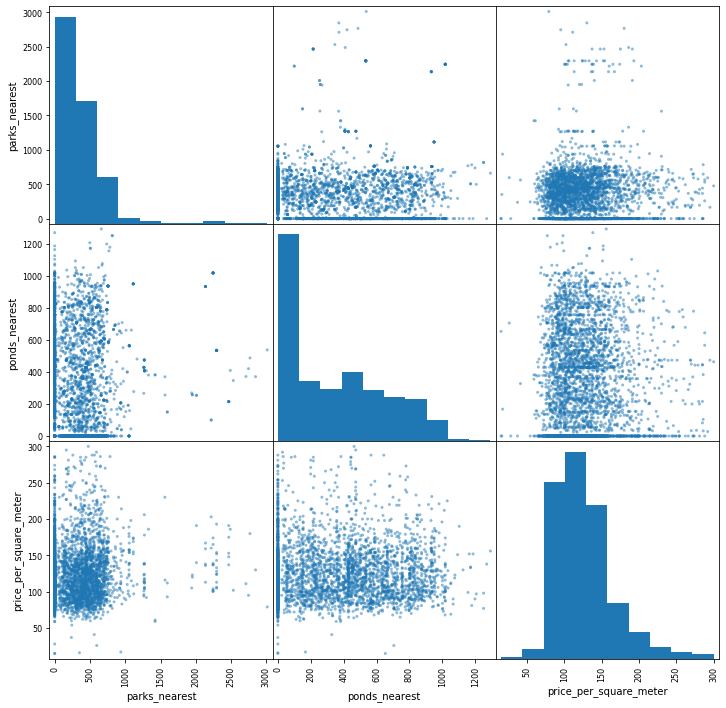

In [140]:
columns_to_study = ['parks_nearest', 'ponds_nearest', 'price_per_square_meter']
pp_filter = 'parks_nearest > 0 and ponds_nearest > 0'
print(downtown_data.query(pp_filter)[columns_to_study].corr())
pd.plotting.scatter_matrix(downtown_data[columns_to_study], figsize=(12,12))
plt.show()

                        parks_around3000  ponds_around3000  \
parks_around3000                1.000000          0.121327   
ponds_around3000                0.121327          1.000000   
price_per_square_meter          0.003890          0.065797   

                        price_per_square_meter  
parks_around3000                      0.003890  
ponds_around3000                      0.065797  
price_per_square_meter                1.000000  


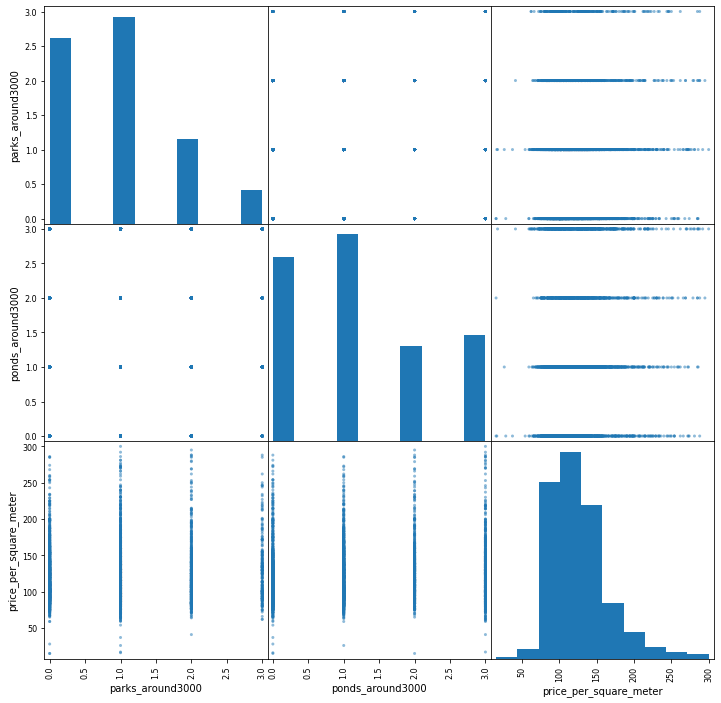

In [141]:
columns_to_study = ['parks_around3000', 'ponds_around3000', 'price_per_square_meter']
pp_filter = 'parks_nearest > 0 and ponds_nearest > 0'
print(downtown_data.query(pp_filter)[columns_to_study].corr())
pd.plotting.scatter_matrix(downtown_data[columns_to_study], figsize=(12,12))
plt.show()

In [142]:
downtown_data.groupby(['parks_around3000'])['price_per_square_meter'].mean()

parks_around3000
0    123.341211
1    126.286755
2    125.208065
3    130.670782
Name: price_per_square_meter, dtype: float64

In [143]:
downtown_data.groupby(['ponds_around3000'])['price_per_square_meter'].mean()

ponds_around3000
0    119.864655
1    125.222905
2    131.093802
3    129.832586
Name: price_per_square_meter, dtype: float64

In [144]:
clear_data.groupby(['parks_around3000'])['price_per_square_meter'].mean()

parks_around3000
-1     60.921460
 0    102.003840
 1    110.083082
 2    112.710238
 3    112.681382
Name: price_per_square_meter, dtype: float64

In [145]:
clear_data.groupby(['ponds_around3000'])['price_per_square_meter'].mean()

ponds_around3000
-1     60.921460
 0    103.092139
 1    105.718307
 2    109.415562
 3    120.031521
Name: price_per_square_meter, dtype: float64

It looks like we have weak influence of the number of parks and ponds nearby on the price per square meter in the downtown and full data. But actually the correlation matrix and charts not really support the idea. Maybe just keep in mind that there could be some dependencies here.

### Step 5. Overall conclusion

In this project we explored data from Yandex.Realty for Saint Peterburg region
- We dealt with missing values: some were filled, some were marked with -1 values. For the columns 'ceiling_height' and 'days_exposition' we added indicator columns to easily identify later if the value was replaced or initially was in the data and actually used the columns in future exploration.
- We added some calculated columns to the data to help us with exploration 
- We deleted some outliers data points, save the result in clear_data dataframe and use it for later exploration
- We discovered that the most influential parameter on the price is 'total area' (no wonder here) so later used composite parameter of price per square meter to study other dependencies
- We discovered weak negative correlation between distance to the Saint Peterburg center and price per square meter. Defined zone of downtown in the Saint Petersburg and discovered that in this zone the influence of distance to city center dissapear.
- We found which popular locations has the highest average prices (Saint Peterburg) and which the lowest (Vyborg)
- We explored patterns in the timing of ads publication, its influence on prices and explored the average lengthes of the ads being exposed before probably the deal was done.
- We detected some other patterns and correlations in the data
<br><br>
Overall conclusion we can make after the exploration made that even though there are some interesting patterns and dependencies in the data we actually need more data to make decent price evaluation here. But we definately did some work with the data that simplify its usage in more advanced analisis.